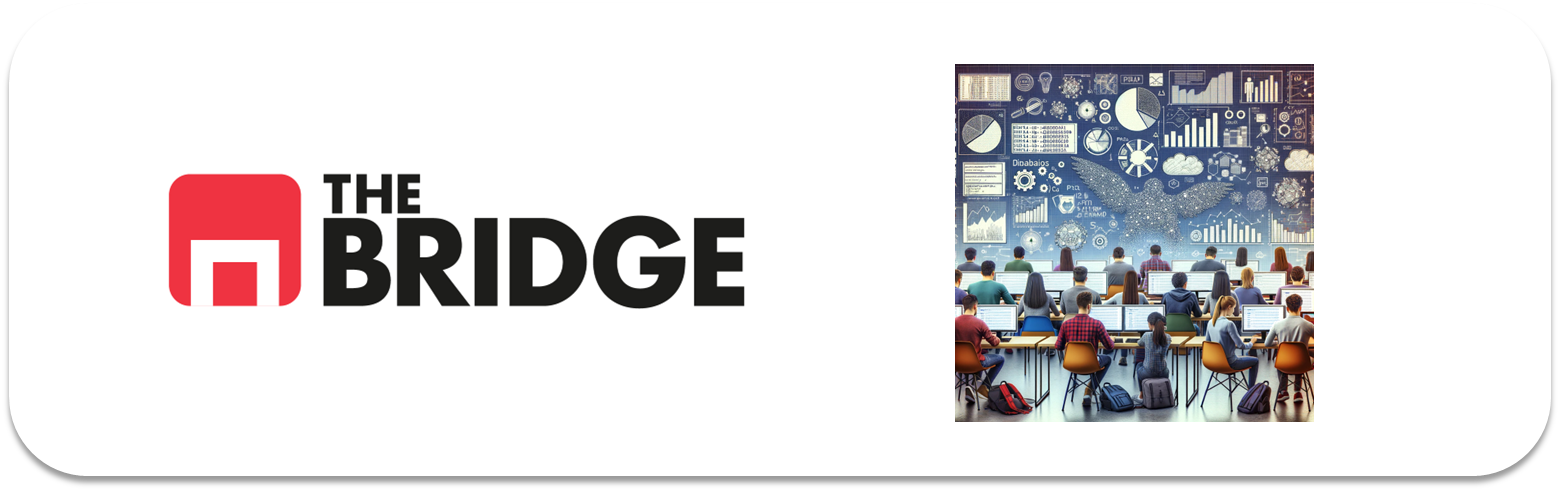

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep = "|")

In [3]:
target = "MEDV"

<Axes: xlabel='MEDV', ylabel='Count'>

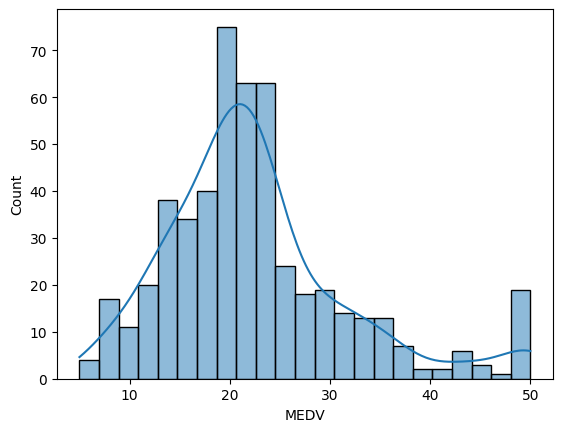

In [4]:
sns.histplot(x = target, data = df, kde = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 27) 

In [8]:
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]

### Mini-eda


In [9]:
## Bivariante  -> target con todas las demas
## Colinealidad de features -> Le sienta mal para generalizar -> Heatmap de las variables numéricas 

In [9]:
corr = train_set.corr(numeric_only = True)

In [11]:
corr[target].sort_values(ascending = False)

MEDV       1.000000
RM         0.709099
ZN         0.312033
DIS        0.203819
CHAS       0.188980
AGE       -0.330530
CRIM      -0.364370
RAD       -0.364448
NOX       -0.386677
TAX       -0.454998
INDUS     -0.458027
PTRATIO   -0.523747
LSTAT     -0.728686
Name: MEDV, dtype: float64

In [12]:
import numpy as np 
np.abs(corr[target]).sort_values(ascending = False)

MEDV       1.000000
LSTAT      0.728686
RM         0.709099
PTRATIO    0.523747
INDUS      0.458027
TAX        0.454998
NOX        0.386677
RAD        0.364448
CRIM       0.364370
AGE        0.330530
ZN         0.312033
DIS        0.203819
CHAS       0.188980
Name: MEDV, dtype: float64

In [13]:
serie_corr = np.abs(corr[target]).sort_values(ascending = False)

In [14]:
criterio = 0.31
features_num = serie_corr[serie_corr > criterio].index.to_list()
features_num.remove(target)
features_num.remove("RAD") # Porque la vamos a considerar categorica

In [15]:
features_num

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'AGE', 'ZN']

In [16]:
criterio_col = 0.7
excluidas = []
for col in features_num:
    print(f"Voy a comprobar la colinealidad con {col}")
    if col not in excluidas:
        for col_2,valor_corr in corr[col].items():
            print(f"Comprobando con {col_2}")
            if col != col_2 and col_2 in features_num:
                if np.abs(valor_corr) >= criterio_col:
                    print(f"Correlo al {valor_corr}, por eso excluyo a {col_2}")
                    excluidas.append(col_2)
                else:
                    print(f"Conmigo no tiene problema, dejo a {col_2} tranquila")
            elif col == col_2:
                print("soy yo misma, no me excluyo")
            else:
                print("No estaba ya en la lista original, no hago nada")
excluidas = list(set(excluidas))

Voy a comprobar la colinealidad con LSTAT
Comprobando con CRIM
Conmigo no tiene problema, dejo a CRIM tranquila
Comprobando con ZN
Conmigo no tiene problema, dejo a ZN tranquila
Comprobando con INDUS
Conmigo no tiene problema, dejo a INDUS tranquila
Comprobando con CHAS
No estaba ya en la lista original, no hago nada
Comprobando con NOX
Conmigo no tiene problema, dejo a NOX tranquila
Comprobando con RM
Conmigo no tiene problema, dejo a RM tranquila
Comprobando con AGE
Conmigo no tiene problema, dejo a AGE tranquila
Comprobando con DIS
No estaba ya en la lista original, no hago nada
Comprobando con RAD
No estaba ya en la lista original, no hago nada
Comprobando con TAX
Conmigo no tiene problema, dejo a TAX tranquila
Comprobando con PTRATIO
Conmigo no tiene problema, dejo a PTRATIO tranquila
Comprobando con LSTAT
soy yo misma, no me excluyo
Comprobando con MEDV
No estaba ya en la lista original, no hago nada
Voy a comprobar la colinealidad con RM
Comprobando con CRIM
Conmigo no tiene pro

In [17]:
for excluida in excluidas:
    features_num.remove(excluida)
features_num

['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'CRIM', 'AGE', 'ZN']

<Axes: >

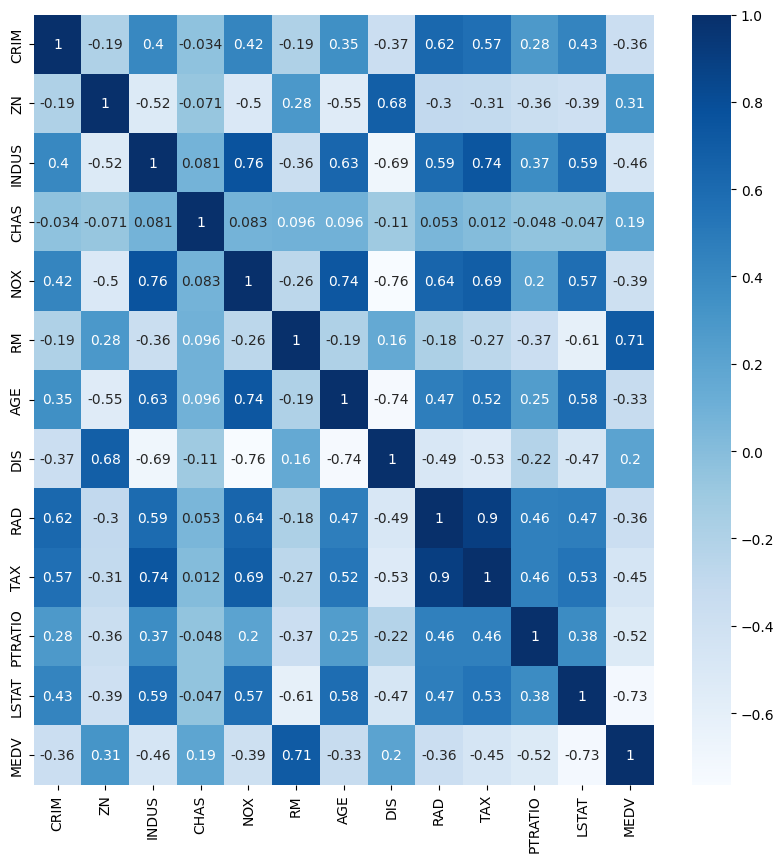

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True, cmap = "Blues")

In [19]:
features_wchas = ["LSTAT", "RM", "PTRATIO", "INDUS","RAD", "CRIM", "AGE", "ZN","CHAS"]
features_wo_chas = ["LSTAT", "RM", "PTRATIO", "INDUS","RAD", "CRIM", "AGE", "ZN"]


In [20]:
features_cat = ["CHAS","RAD"]

<Axes: xlabel='MEDV', ylabel='Count'>

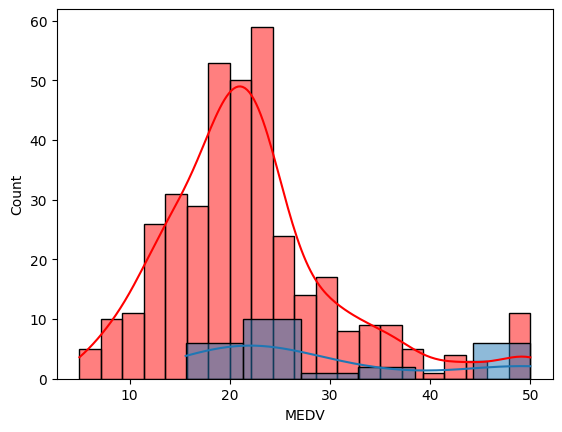

In [21]:
sns.histplot(x= target, data = train_set[train_set.CHAS == 0], kde = True, color = "red")
sns.histplot(x= target, data = train_set[train_set.CHAS == 1], kde = True)

In [22]:
train_set.RAD.value_counts(normalize = True)

RAD
24.0    0.250000
5.0     0.232673
4.0     0.230198
3.0     0.069307
6.0     0.054455
2.0     0.047030
8.0     0.044554
1.0     0.037129
7.0     0.034653
Name: proportion, dtype: float64

<Axes: xlabel='MEDV', ylabel='Count'>

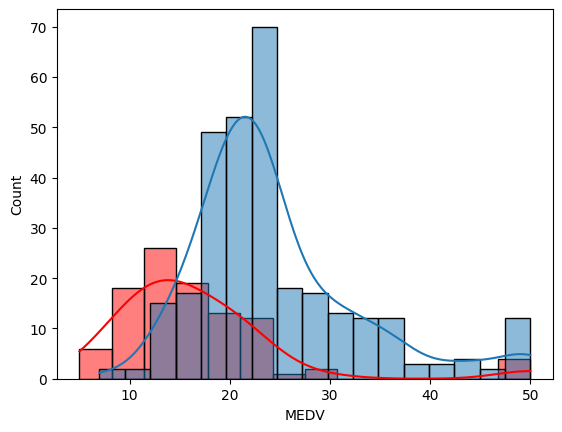

In [23]:
sns.histplot(x= target, data = train_set[train_set.RAD == 24], kde = True, color = "red")
sns.histplot(x= target, data = train_set[train_set.RAD != 24], kde = True)

En resumen mi feature selection me dice:

In [24]:
features_num


['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'CRIM', 'AGE', 'ZN']

In [25]:
features_cat

['CHAS', 'RAD']

Procesar las numéricas

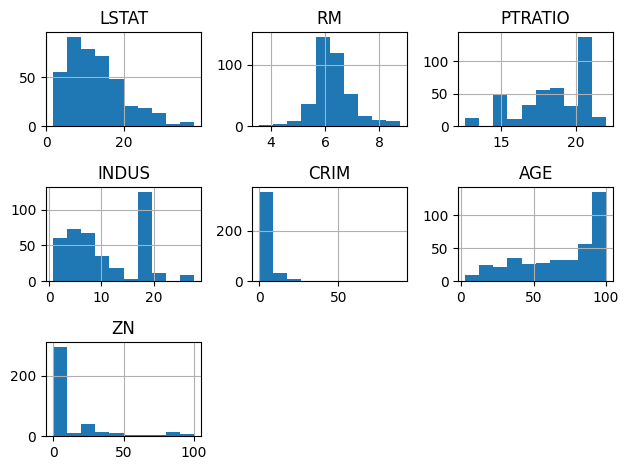

In [26]:
train_set[features_num].hist()
plt.tight_layout()

In [27]:
train_bck = train_set.copy()

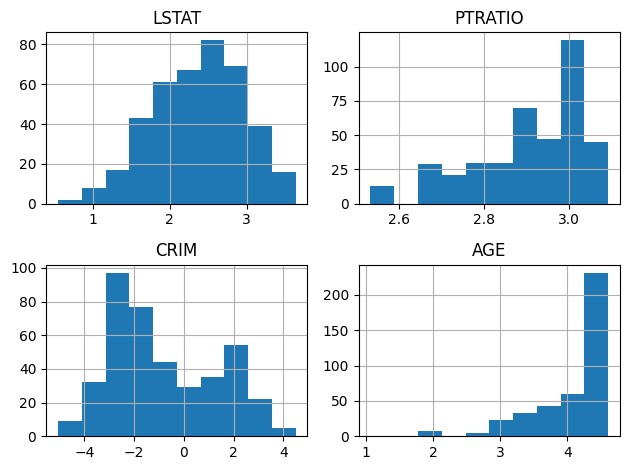

In [28]:
features_transform = ["LSTAT","PTRATIO","CRIM","AGE"]
for feature in features_transform:
    train_set[feature] = train_set[feature].apply(np.log)

train_set[features_transform].hist()
plt.tight_layout();

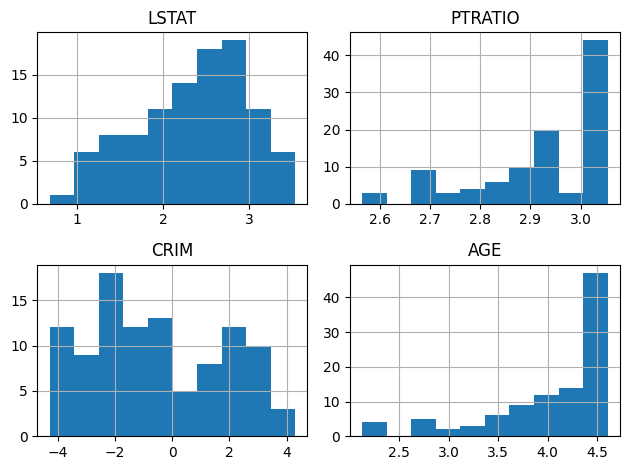

In [29]:
features_transform = ["LSTAT","PTRATIO","CRIM","AGE"]
for feature in features_transform:
    test_set[feature] = test_set[feature].apply(np.log)

test_set[features_transform].hist()
plt.tight_layout();

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_set[features_num])


StandardScaler()

In [31]:
scaler.scale_

array([ 0.58590737,  0.69814249,  0.12531422,  6.79730591,  2.12362703,
        0.60419298, 22.60330891])

In [32]:

train_set[features_num] =scaler.transform(train_set[features_num])
test_set[features_num] = scaler.transform(test_set[features_num])

In [33]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 162 to 19
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  LSTAT    404 non-null    float64
 12  MEDV     404 non-null    float64
dtypes: float64(13)
memory usage: 44.2 KB


In [34]:
train_set[features_num].describe()

,LSTAT,RM,PTRATIO,INDUS,CRIM,AGE,ZN
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,5.628061e-16,-6.111723e-16,1.429000e-15,-3.517538e-17,1.758769e-17,1.758769e-17,4.396923e-17
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-3.122405e+00,-3.896475e+00,-2.966665e+00,-1.512688e+00,-1.983982e+00,-5.021051e+00,-4.904872e-01
25%,-6.892355e-01,-5.679995e-01,-6.236203e-01,-8.668439e-01,-7.924663e-01,-4.709416e-01,-4.904872e-01
50%,8.062611e-02,-1.379297e-01,2.477555e-01,-1.959899e-01,-2.712400e-01,4.317736e-01,-4.904872e-01
75%,7.298304e-01,4.629505e-01,7.997536e-01,1.041265e+00,9.891185e-01,7.367949e-01,6.252918e-02
max,2.149204e+00,3.579077e+00,1.480920e+00,2.459474e+00,2.514174e+00,8.387650e-01,3.933644e+00


In [35]:
test_set[features_num].describe()

,LSTAT,RM,PTRATIO,INDUS,CRIM,AGE,ZN
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,-0.055852,0.023732,0.097048,0.083619,0.164368,-0.062330,0.060794
std,1.120935,1.031429,0.976291,1.042854,1.077397,1.051580,1.149017
min,-2.892035,-3.069996,-2.717271,-1.553881,-1.615897,-3.260817,-0.490487
25%,-0.841681,-0.559763,-0.299752,-0.759448,-0.665244,-0.592187,-0.490487
50%,0.182499,0.020347,0.394593,-0.180543,-0.015288,0.397558,-0.490487
75%,0.829796,0.609769,0.799754,1.041265,1.147310,0.745091,-0.490487
max,1.979191,2.832811,1.185333,2.151999,2.424413,0.838765,3.712437


In [36]:
features_all = features_num + features_cat

In [37]:
X_train = train_set[features_all]
y_train = train_set[target]

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 162 to 19
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LSTAT    404 non-null    float64
 1   RM       404 non-null    float64
 2   PTRATIO  404 non-null    float64
 3   INDUS    404 non-null    float64
 4   CRIM     404 non-null    float64
 5   AGE      404 non-null    float64
 6   ZN       404 non-null    float64
 7   CHAS     404 non-null    float64
 8   RAD      404 non-null    float64
dtypes: float64(9)
memory usage: 31.6 KB


In [39]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [40]:
lin_reg.coef_

array([-5.78608576e+00,  1.95724303e+00, -1.86776566e+00, -4.67531430e-01,
        1.75443754e-01,  9.20208891e-01, -6.10205710e-01,  3.88330405e+00,
       -1.37207588e-03])

In [41]:
lin_reg.feature_names_in_

array(['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'CRIM', 'AGE', 'ZN', 'CHAS',
       'RAD'], dtype=object)

In [42]:
print("y_est = ", end = "")
for coef,feat in zip(lin_reg.coef_, lin_reg.feature_names_in_):
    print(f"{coef}*{feat}", end = " + ")

y_est = -5.786085762238205*LSTAT + 1.957243028375863*RM + -1.867765663980955*PTRATIO + -0.46753143032318073*INDUS + 0.17544375350016966*CRIM + 0.9202088910652186*AGE + -0.6102057097661449*ZN + 3.883304053481175*CHAS + -0.0013720758790178866*RAD + 

In [43]:
### train_error
from sklearn.metrics import median_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
pred_train = lin_reg.predict(X_train)

print("MAE:", median_absolute_error(y_train, pred_train))
print("RMSE:", root_mean_squared_error(y_train, pred_train))
print("R^2:", lin_reg.score(X_train, y_train))


MAE: 2.339364874671663
RMSE: 4.444442787530667
R^2: 0.7616050101503492


In [44]:
X_test = test_set[features_all]
y_test = test_set[target]

In [45]:
### test_error
from sklearn.metrics import median_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
pred_test = lin_reg.predict(X_test)

print("MAE:", median_absolute_error(y_test, pred_test))
print("RMSE:", root_mean_squared_error(y_test, pred_test))
print("R^2:", lin_reg.score(X_test, y_test))

MAE: 2.925681976075337
RMSE: 5.14439629148252
R^2: 0.7079009469972836


Text(0, 0.5, 'Prediction')

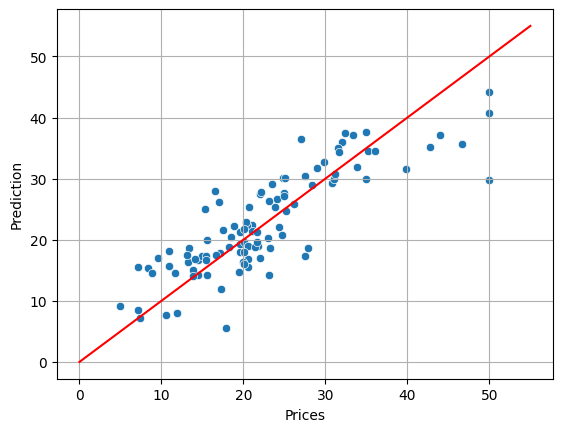

In [46]:
sns.scatterplot(x=y_test, y= pred_test)
plt.plot([0,55],[0,55],'red')
plt.grid()
plt.xlabel('Prices')
plt.ylabel('Prediction')

In [47]:
### Regularizacion
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge_reg = Ridge(alpha = 1000) # L2
lasso_reg = Lasso(alpha = 1000) # L1
elastic_reg = ElasticNet(alpha = 10, l1_ratio = 0.5) # l1_ratio*L1 + (1-l1_ratio)*L2

for nombre, model in zip(["Ridge","Lasso","ElasticNet"],[ridge_reg, lasso_reg, elastic_reg]):
    model.fit(X_train,y_train)
    print("Modelo:", nombre)
    print("TRAIN:")
    pred_train  = model.predict(X_train)
    print("MAE:", median_absolute_error(y_train, pred_train))
    print("RMSE:", root_mean_squared_error(y_train, pred_train))
    print("R^2:", lin_reg.score(X_train, y_train))
    print("TEST:")
    pred_test = model.predict(X_test)
    print("MAE:", median_absolute_error(y_test, pred_test))
    print("RMSE:", root_mean_squared_error(y_test, pred_test))
    print("R^2:", lin_reg.score(X_test, y_test))

Modelo: Ridge
TRAIN:
MAE: 3.1818072364421166
RMSE: 6.316953972313686
R^2: 0.7616050101503492
TEST:
MAE: 3.551126247488874
RMSE: 6.445906586643869
R^2: 0.7079009469972836
Modelo: Lasso
TRAIN:
MAE: 4.484158415841588
RMSE: 9.102669151291543
R^2: 0.7616050101503492
TEST:
MAE: 5.699999999999999
RMSE: 9.51852050530104
R^2: 0.7079009469972836
Modelo: ElasticNet
TRAIN:
MAE: 4.329564270685726
RMSE: 8.2744311200742
R^2: 0.7616050101503492
TEST:
MAE: 4.956392414400646
RMSE: 8.425836849841787
R^2: 0.7079009469972836
